In [1]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 7.58 MiB/s, done.
Resolving deltas: 100% (10/10), done.


## Tensorflow and Keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [3]:
#load images

from tensorflow.keras.preprocessing.image import load_img

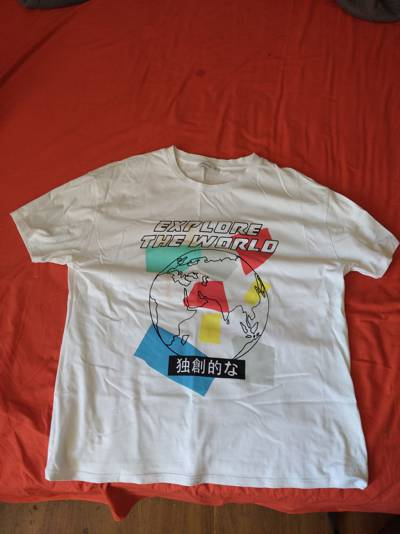

In [4]:
path = './clothing-dataset-small/train/t-shirt'
name = '00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [5]:
#we can specifi size for image
img = load_img(fullname, target_size = (299, 299))

In [6]:
print(img)
#PIL is python image library used for processing images

<PIL.Image.Image image mode=RGB size=299x299 at 0x7959C8D72800>


In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

In [8]:
x

array([[[104,  20,  10],
        [105,  21,  11],
        [105,  21,  11],
        ...,
        [ 43,  35,  33],
        [ 42,  34,  32],
        [ 39,  31,  29]],

       [[105,  21,  11],
        [105,  21,  11],
        [106,  22,  12],
        ...,
        [ 41,  33,  31],
        [ 41,  33,  31],
        [ 40,  32,  30]],

       [[106,  22,  12],
        [106,  22,  12],
        [107,  23,  13],
        ...,
        [ 42,  34,  32],
        [ 41,  33,  31],
        [ 38,  30,  28]],

       ...,

       [[ 88,  67,  40],
        [ 92,  71,  44],
        [ 89,  68,  41],
        ...,
        [ 19,   7,   7],
        [ 19,   7,   7],
        [ 19,   7,   7]],

       [[ 88,  67,  40],
        [ 89,  68,  41],
        [ 85,  64,  37],
        ...,
        [ 22,  10,  10],
        [ 22,  10,  10],
        [ 22,  10,  10]],

       [[ 86,  65,  38],
        [ 91,  70,  43],
        [ 88,  67,  40],
        ...,
        [ 22,  10,  10],
        [ 22,  10,  10],
        [ 22,  10,  10]]

## Pre-trained Convolutional Neural Networks

In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import  preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [10]:
#download the model

model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 [==============================] - 0s 0us/step


In [11]:
#X only contains one images
X = np.array([x])
X.shape

(1, 299, 299, 3)

1 = one images

299, 299 = input images (w*l)

3 = RGB

In [12]:
#pre-process input

X = preprocess_input(X)
X[0]

array([[[-0.18431371, -0.84313726, -0.92156863],
        [-0.17647058, -0.8352941 , -0.9137255 ],
        [-0.17647058, -0.8352941 , -0.9137255 ],
        ...,
        [-0.6627451 , -0.7254902 , -0.7411765 ],
        [-0.67058825, -0.73333335, -0.7490196 ],
        [-0.69411767, -0.75686276, -0.77254903]],

       [[-0.17647058, -0.8352941 , -0.9137255 ],
        [-0.17647058, -0.8352941 , -0.9137255 ],
        [-0.16862744, -0.827451  , -0.90588236],
        ...,
        [-0.6784314 , -0.7411765 , -0.75686276],
        [-0.6784314 , -0.7411765 , -0.75686276],
        [-0.6862745 , -0.7490196 , -0.7647059 ]],

       [[-0.16862744, -0.827451  , -0.90588236],
        [-0.16862744, -0.827451  , -0.90588236],
        [-0.1607843 , -0.81960785, -0.8980392 ],
        ...,
        [-0.67058825, -0.73333335, -0.7490196 ],
        [-0.6784314 , -0.7411765 , -0.75686276],
        [-0.7019608 , -0.7647059 , -0.78039217]],

       ...,

       [[-0.3098039 , -0.47450978, -0.6862745 ],
        [-0

In [13]:
pred = model.predict(X)
pred.shape

1/1 [==============================] - 9s 9s/step


(1, 1000)

In [14]:
pred

array([[3.88374101e-05, 1.03667517e-04, 6.95540875e-05, 5.64127367e-05,
        1.73176828e-04, 6.16783000e-05, 7.77983660e-05, 1.76401827e-05,
        2.35524203e-05, 6.70653608e-05, 3.63625877e-05, 4.78463771e-05,
        2.27390301e-05, 3.77424003e-05, 3.98138873e-05, 7.90367048e-05,
        7.35870999e-05, 3.93939335e-05, 3.63956824e-05, 4.93533698e-05,
        1.01220292e-04, 4.70199411e-05, 1.71821303e-04, 3.48195717e-05,
        6.73889372e-05, 7.67658130e-05, 6.94889823e-05, 1.04646118e-04,
        1.43553712e-04, 3.50545015e-05, 9.08775619e-05, 7.42032280e-05,
        7.91515777e-05, 1.18636141e-04, 8.62143715e-05, 6.65205516e-05,
        6.65169282e-05, 1.00561017e-04, 1.15359107e-04, 8.18708431e-05,
        3.98355733e-05, 2.07668782e-04, 9.28521913e-05, 6.58220379e-05,
        2.55473977e-04, 1.02915132e-04, 9.53716517e-05, 4.18771124e-05,
        7.76615998e-05, 1.03376762e-04, 2.33118248e-04, 5.80463748e-05,
        1.59113755e-04, 1.16597766e-04, 7.08393272e-05, 9.702489

In [15]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


[[('n03595614', 'jersey', 0.8878357),
  ('n03710637', 'maillot', 0.0068344944),
  ('n04456115', 'torch', 0.0064636306),
  ('n02730930', 'apron', 0.0059278295),
  ('n04235860', 'sleeping_bag', 0.0054278956)]]

## Transfer Learning

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [17]:
train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train',
                              target_size=(150, 150),
                              batch_size=32)

Found 3068 images belonging to 10 classes.


In [18]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [19]:
#only work with linux
# !ls -l clothing-dataset-small

In [20]:
#look inside
X, y = next(train_ds)
X.shape

(32, 150, 150, 3)

In [21]:
#target look like
y[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
#validation
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle = False)

Found 341 images belonging to 10 classes.


In [23]:
#train the model

base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3))

#only want vector representations
base_model.trainable = False

83683744/83683744 [==============================] - 0s 0us/step


next create new top

In [24]:
#to get the vector representations

inputs = keras.Input(shape=(150, 150, 3))
#4D
base = base_model(inputs, training = False)
#gives vector representation
vectors = keras.layers.GlobalAveragePooling2D()(base)
#turn vector representations into predictions
#10 means 10 classes
outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [25]:
preds = model.predict(X)

1/1 [==============================] - 2s 2s/step


In [26]:
preds[0]
#not yet train the model

array([ 1.2801621 , -0.09019661, -0.3288603 ,  0.16275145, -0.15344983,
       -0.7470119 ,  0.4554674 ,  0.32414475, -1.8171673 ,  0.7576555 ],
      dtype=float32)

In [27]:
#let's train the model

learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate = learning_rate)

loss= keras.losses.CategoricalCrossentropy(from_logits=True)

In [28]:

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [29]:
history = model.fit(train_ds, epochs = 10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 14s 116ms/step - loss: 1.2242 - accuracy: 0.6780 - val_loss: 0.9726 - val_accuracy: 0.7566
Epoch 2/10
96/96 [==============================] - 8s 83ms/step - loss: 0.5666 - accuracy: 0.8207 - val_loss: 0.9182 - val_accuracy: 0.7713
Epoch 3/10
96/96 [==============================] - 8s 80ms/step - loss: 0.3556 - accuracy: 0.8814 - val_loss: 1.0862 - val_accuracy: 0.7449
Epoch 4/10
96/96 [==============================] - 9s 91ms/step - loss: 0.2555 - accuracy: 0.9133 - val_loss: 0.9061 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 8s 87ms/step - loss: 0.2193 - accuracy: 0.9234 - val_loss: 0.9753 - val_accuracy: 0.7977
Epoch 6/10
96/96 [==============================] - 8s 81ms/step - loss: 0.0980 - accuracy: 0.9677 - val_loss: 0.8496 - val_accuracy: 0.8211
Epoch 7/10
96/96 [==============================] - 9s 92ms/step - loss: 0.0616 - accuracy: 0.9798 - val_loss: 0.9696 - val_accuracy: 0.7859
Epoch 8/10


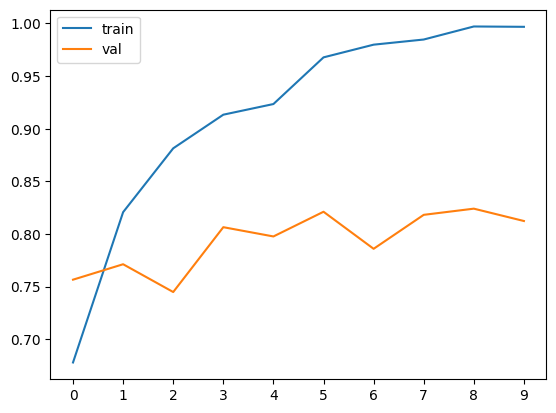

In [30]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label = 'val')
plt.xticks(np.arange(10))
plt.legend()

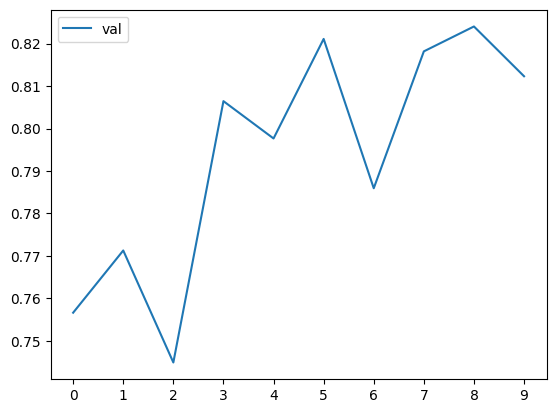

In [31]:
#for validation

plt.plot(history.history['val_accuracy'], label = 'val')
plt.xticks(np.arange(10))
plt.legend()

Overfitting

## Adjusting the learning rate

In [32]:
def make_model(learning_rate=0.01):
  base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3))

  base_model.trainable = False

  ##############################
  #Architecture of model

  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(inputs, training = False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)
  outputs = keras.layers.Dense(10)(vectors)
  model = keras.Model(inputs, outputs)

  ##############################

  learning_rate = 0.01
  optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
  loss= keras.losses.CategoricalCrossentropy(from_logits=True)
  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
      )
  return model

In [33]:
scores={}

for lr in [0.0001, 0.001, 0.01, 0.1]:
  print(lr)
  model = make_model(learning_rate=lr)
  history = model.fit(train_ds, epochs = 10, validation_data=val_ds)
  scores[lr] = history.history

  print()
  print()

0.0001
Epoch 1/10
96/96 [==============================] - 12s 92ms/step - loss: 1.3115 - accuracy: 0.6617 - val_loss: 0.9721 - val_accuracy: 0.7302
Epoch 2/10
96/96 [==============================] - 9s 89ms/step - loss: 0.5181 - accuracy: 0.8357 - val_loss: 0.8552 - val_accuracy: 0.7859
Epoch 3/10
96/96 [==============================] - 8s 87ms/step - loss: 0.3350 - accuracy: 0.8833 - val_loss: 0.8801 - val_accuracy: 0.7918
Epoch 4/10
96/96 [==============================] - 9s 90ms/step - loss: 0.2530 - accuracy: 0.9117 - val_loss: 0.9615 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 9s 92ms/step - loss: 0.1803 - accuracy: 0.9397 - val_loss: 0.9605 - val_accuracy: 0.7889
Epoch 6/10
96/96 [==============================] - 8s 82ms/step - loss: 0.1462 - accuracy: 0.9478 - val_loss: 0.8663 - val_accuracy: 0.8152
Epoch 7/10
96/96 [==============================] - 10s 105ms/step - loss: 0.0752 - accuracy: 0.9762 - val_loss: 1.0273 - val_accuracy: 0.7771
Epo

In [34]:
for lr, hist in scores.items():
  print(lr)
  print(hist)

0.0001
{'loss': [1.3115100860595703, 0.5180732011795044, 0.3350241482257843, 0.2530362904071808, 0.18034586310386658, 0.14624936878681183, 0.07515706866979599, 0.07355010509490967, 0.04897747188806534, 0.023526063188910484], 'accuracy': [0.6616688370704651, 0.8357235789299011, 0.8833116292953491, 0.9116688370704651, 0.9397001266479492, 0.9478487372398376, 0.9762060046195984, 0.9771838188171387, 0.9859843254089355, 0.9954367876052856], 'val_loss': [0.9720751643180847, 0.8551850318908691, 0.8800774812698364, 0.9615336060523987, 0.9604837894439697, 0.8663159012794495, 1.0272643566131592, 0.9443584680557251, 0.9808049201965332, 1.009035348892212], 'val_accuracy': [0.7302052974700928, 0.7859237790107727, 0.7917888760566711, 0.8064516186714172, 0.7888563275337219, 0.8152492642402649, 0.7771260738372803, 0.8181818127632141, 0.7976539731025696, 0.7859237790107727]}
0.001
{'loss': [1.2101655006408691, 0.6133658289909363, 0.3431255519390106, 0.2571924328804016, 0.14290751516819, 0.11702639609575

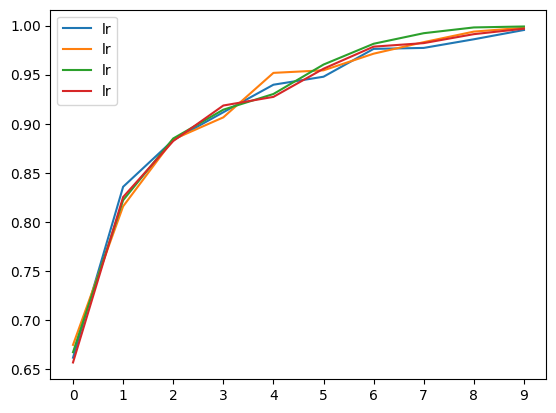

In [35]:
#plot train accuracy
for lr, hist in scores.items():
  plt.plot(hist['accuracy'], label='lr')
plt.xticks(np.arange(10))
plt.legend()

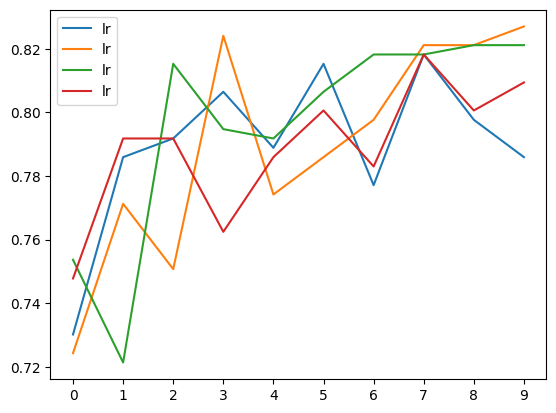

In [36]:
#plot validation accuracy
for lr, hist in scores.items():
  plt.plot(hist['val_accuracy'], label='lr')
plt.xticks(np.arange(10))
plt.legend()

In [37]:
#delete for some scores
del scores[0.1]
del scores[0.0001]

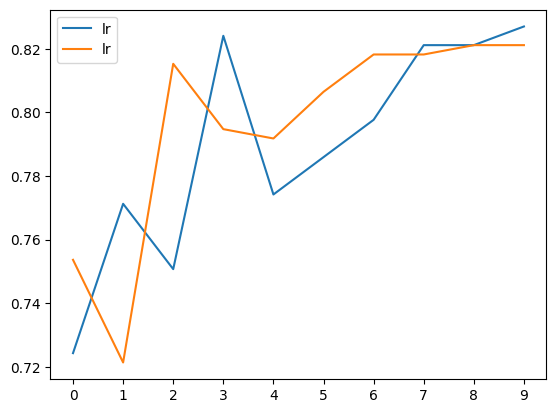

In [38]:
#plot validation accuracy
for lr, hist in scores.items():
  plt.plot(hist['val_accuracy'], label='lr')
plt.xticks(np.arange(10))
plt.legend()

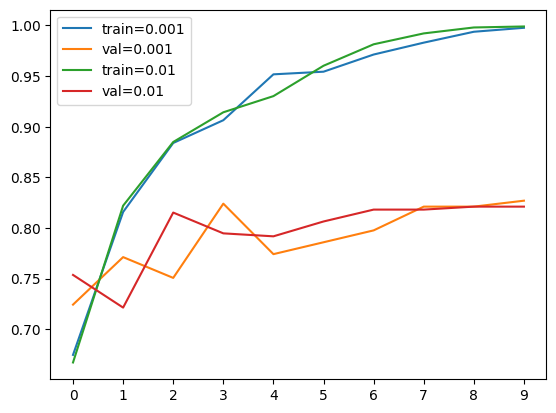

In [39]:
#plot training and validation accuracy
for lr, hist in scores.items():
  plt.plot(hist['accuracy'], label='train=%s' % lr)
  plt.plot(hist['val_accuracy'], label='val=%s' % lr)
plt.xticks(np.arange(10))
plt.legend()

In [40]:
learning_rate == 0.001

False

## Checkpointing

In [41]:
model.save_weights('model_v1.h5', save_format='h5')

In [42]:
#format to save the checkpoint model
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'.format(epoch=3, val_accuracy=0.84)

'xception_v1_03_0.840.h5'

In [43]:
#  to save the model
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
    )

In [44]:
learning_rate= 0.001

model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds,
    epochs = 10,
    validation_data=val_ds,
    callbacks=[checkpoint]
    )

Epoch 1/10
96/96 [==============================] - ETA: 0s - loss: 1.2448 - accuracy: 0.6750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 12s 101ms/step - loss: 1.2448 - accuracy: 0.6750 - val_loss: 0.8660 - val_accuracy: 0.7419
Epoch 2/10
96/96 [==============================] - 8s 87ms/step - loss: 0.5926 - accuracy: 0.8178 - val_loss: 0.9006 - val_accuracy: 0.7801
Epoch 3/10
96/96 [==============================] - 9s 93ms/step - loss: 0.3640 - accuracy: 0.8755 - val_loss: 0.7808 - val_accuracy: 0.7977
Epoch 4/10
96/96 [==============================] - 9s 94ms/step - loss: 0.2477 - accuracy: 0.9120 - val_loss: 0.8349 - val_accuracy: 0.8211
Epoch 5/10
96/96 [==============================] - 8s 82ms/step - loss: 0.1671 - accuracy: 0.9390 - val_loss: 0.8472 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 11s 118ms/step - loss: 0.1254 - accuracy: 0.9573 - val_loss: 0.8064 - val_accuracy: 0.8182
Epoch 7/10
96/96 [==============================] - 13s 136ms/step - loss: 0.0814 - accuracy: 0.9720 - val_loss: 0.8961 - val_accuracy: 0.8065
Epoch 8/10
96/96 [

## Adding More Layers

In [45]:
def make_model(learning_rate=0.01, size_inner=100):
  base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3))

  base_model.trainable = False

  ##############################
  #Architecture of model

  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(inputs, training = False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)

  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

  outputs = keras.layers.Dense(10)(inner)
  model = keras.Model(inputs, outputs)

  ##############################

  learning_rate = 0.01
  optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
  loss= keras.losses.CategoricalCrossentropy(from_logits=True)
  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
      )
  return model

In [46]:
learning_rate = 0.001

scores={}

for size in [10, 100, 1000]:
  print(size)
  model = make_model(learning_rate=learning_rate, size_inner=size)
  history = model.fit(train_ds, epochs = 10, validation_data=val_ds)
  scores[size] = history.history

  print()
  print()

10
Epoch 1/10
96/96 [==============================] - 14s 107ms/step - loss: 1.4265 - accuracy: 0.5261 - val_loss: 1.0390 - val_accuracy: 0.6129
Epoch 2/10
96/96 [==============================] - 9s 92ms/step - loss: 0.9022 - accuracy: 0.6737 - val_loss: 0.8830 - val_accuracy: 0.6979
Epoch 3/10
96/96 [==============================] - 8s 88ms/step - loss: 0.7006 - accuracy: 0.7396 - val_loss: 0.9515 - val_accuracy: 0.7038
Epoch 4/10
96/96 [==============================] - 8s 81ms/step - loss: 0.6154 - accuracy: 0.7793 - val_loss: 0.8421 - val_accuracy: 0.7537
Epoch 5/10
96/96 [==============================] - 9s 90ms/step - loss: 0.4855 - accuracy: 0.8175 - val_loss: 0.8954 - val_accuracy: 0.7273
Epoch 6/10
96/96 [==============================] - 10s 103ms/step - loss: 0.4115 - accuracy: 0.8546 - val_loss: 0.9384 - val_accuracy: 0.7273
Epoch 7/10
96/96 [==============================] - 8s 81ms/step - loss: 0.3673 - accuracy: 0.8677 - val_loss: 0.9117 - val_accuracy: 0.7361
Epoch 

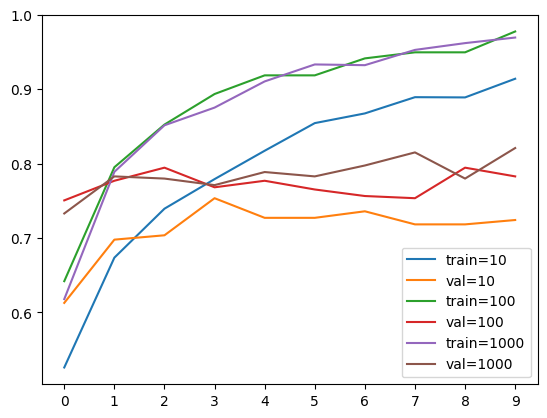

In [47]:
#plot training and validation accuracy
for size, hist in scores.items():
  plt.plot(hist['accuracy'], label='train=%s' % size)
  plt.plot(hist['val_accuracy'], label='val=%s' % size)
plt.xticks(np.arange(10))
plt.legend()

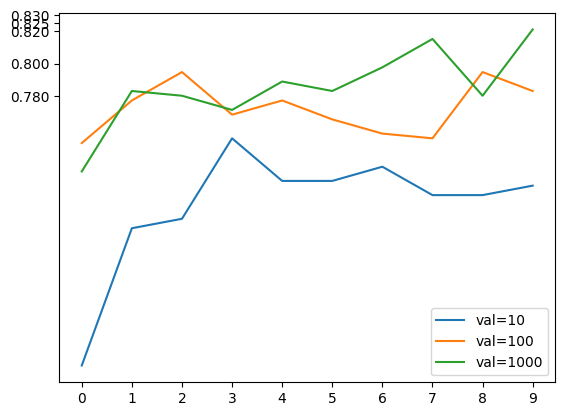

In [48]:
#plot validation accuracy
for size, hist in scores.items():
  plt.plot(hist['val_accuracy'], label='val=%s' % size)
plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## Dropouts and Regularization

In [51]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
  base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3))

  base_model.trainable = False

  ##############################
  #Architecture of model

  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(inputs, training = False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)

  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
  drop = keras.layers.Dropout(0.2)(inner)

  outputs = keras.layers.Dense(10)(drop)
  model = keras.Model(inputs, outputs)

  ##############################

  learning_rate = 0.01
  optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
  loss= keras.losses.CategoricalCrossentropy(from_logits=True)
  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
      )
  return model

In [52]:
learning_rate = 0.001
size = 100

scores={}

for droprate in [0.0, 0.2, 0.5, 0.8]:
  print(droprate)

  model = make_model(
      learning_rate=learning_rate,
      size_inner=size,
      droprate=droprate)

  history = model.fit(train_ds, epochs = 30, validation_data=val_ds)
  scores[droprate] = history.history

  print()
  print()

0.0
Epoch 1/30
96/96 [==============================] - 13s 100ms/step - loss: 1.1603 - accuracy: 0.6186 - val_loss: 0.7547 - val_accuracy: 0.7361
Epoch 2/30
96/96 [==============================] - 8s 81ms/step - loss: 0.8092 - accuracy: 0.7021 - val_loss: 0.7733 - val_accuracy: 0.7625
Epoch 3/30
96/96 [==============================] - 9s 91ms/step - loss: 0.6900 - accuracy: 0.7539 - val_loss: 0.6930 - val_accuracy: 0.7654
Epoch 4/30
96/96 [==============================] - 9s 95ms/step - loss: 0.6013 - accuracy: 0.7872 - val_loss: 0.6993 - val_accuracy: 0.7830
Epoch 5/30
96/96 [==============================] - 9s 89ms/step - loss: 0.5373 - accuracy: 0.8100 - val_loss: 0.6995 - val_accuracy: 0.7889
Epoch 6/30
96/96 [==============================] - 13s 134ms/step - loss: 0.4719 - accuracy: 0.8325 - val_loss: 0.7617 - val_accuracy: 0.7918
Epoch 7/30
96/96 [==============================] - 9s 98ms/step - loss: 0.4591 - accuracy: 0.8338 - val_loss: 0.7766 - val_accuracy: 0.7918
Epoch

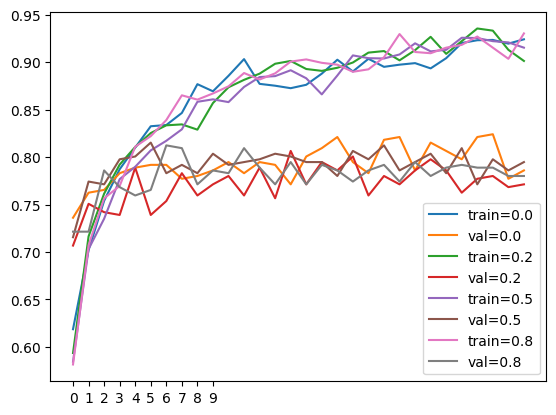

In [53]:
#plot training and validation accuracy
for droprate, hist in scores.items():
  plt.plot(hist['accuracy'], label='train=%s' % droprate)
  plt.plot(hist['val_accuracy'], label='val=%s' % droprate)
plt.xticks(np.arange(10))
plt.legend()

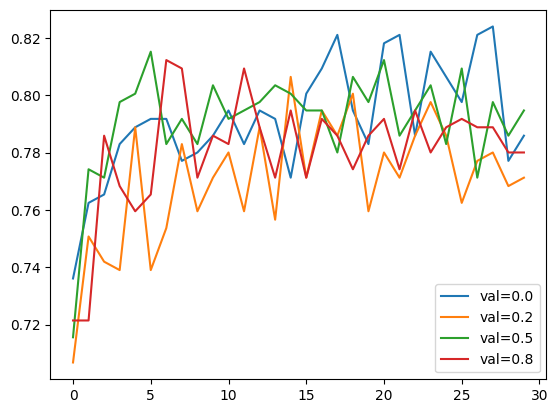

In [54]:
#plot validation accuracy
for droprate, hist in scores.items():
  plt.plot(hist['val_accuracy'], label='val=%s' % droprate)

plt.legend()

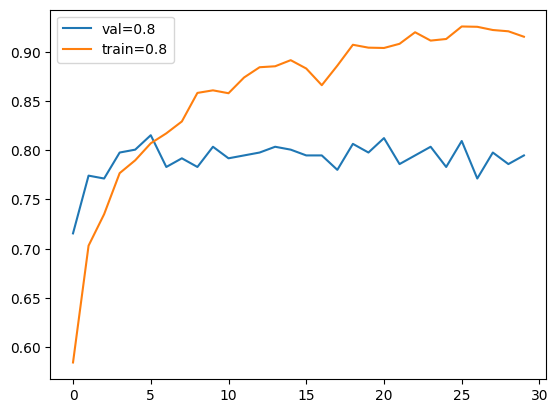

In [55]:
hist = scores[0.50]
plt.plot(hist['val_accuracy'], label='val=%s' % droprate)
plt.plot(hist['accuracy'], label='train=%s' % droprate)
plt.legend()

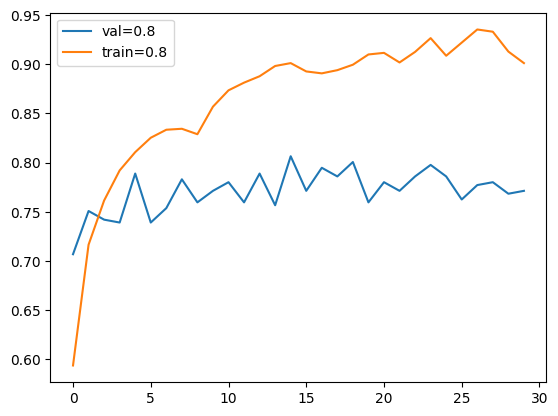

In [56]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label='val=%s' % droprate)
plt.plot(hist['accuracy'], label='train=%s' % droprate)
plt.legend()

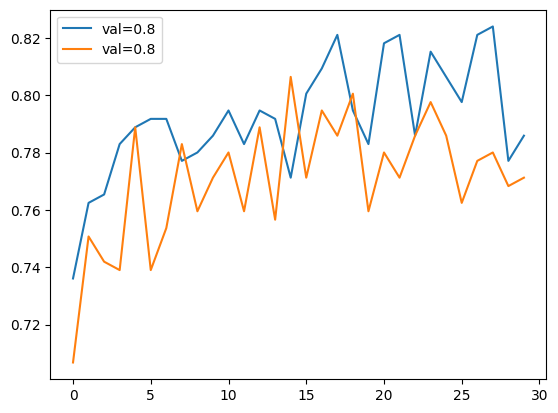

In [57]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label='val=%s' % droprate)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label='val=%s' % droprate)

plt.legend()

## Data Augmentation

In [58]:
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True)

train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train',
                              target_size=(150, 150),
                              batch_size=32)

#validation
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle = False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [59]:
learning_rate = 0.001
size = 100
droprate = 0.2


model = make_model(
      learning_rate=learning_rate,
      size_inner=size,
      droprate=droprate)

history = model.fit(train_ds, epochs = 50, validation_data=val_ds)


Epoch 1/50
96/96 [==============================] - 28s 259ms/step - loss: 1.7243 - accuracy: 0.4850 - val_loss: 0.9967 - val_accuracy: 0.6862
Epoch 2/50
96/96 [==============================] - 23s 239ms/step - loss: 1.1242 - accuracy: 0.6183 - val_loss: 0.7935 - val_accuracy: 0.7273
Epoch 3/50
96/96 [==============================] - 27s 280ms/step - loss: 1.0961 - accuracy: 0.6252 - val_loss: 0.9122 - val_accuracy: 0.6862
Epoch 4/50
96/96 [==============================] - 25s 256ms/step - loss: 1.0189 - accuracy: 0.6415 - val_loss: 0.7759 - val_accuracy: 0.7361
Epoch 5/50
96/96 [==============================] - 24s 253ms/step - loss: 0.9484 - accuracy: 0.6724 - val_loss: 0.8677 - val_accuracy: 0.7038
Epoch 6/50
96/96 [==============================] - 23s 239ms/step - loss: 0.9580 - accuracy: 0.6636 - val_loss: 0.8300 - val_accuracy: 0.7214
Epoch 7/50
96/96 [==============================] - 25s 256ms/step - loss: 0.9065 - accuracy: 0.6845 - val_loss: 0.8784 - val_accuracy: 0.7067

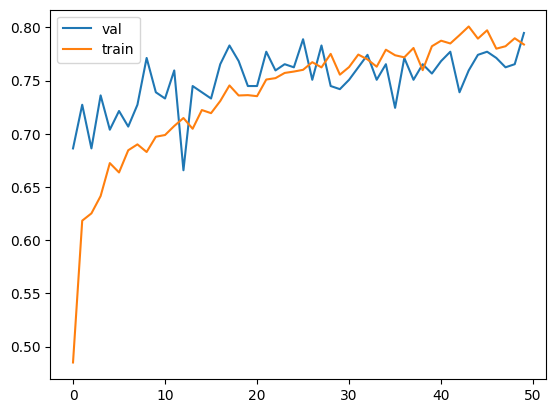

In [60]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label= 'train')

plt.legend()

## Training a larger model

training with 299x299 model

In [61]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
  base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(input_size, input_size, 3))

  base_model.trainable = False

  ##############################
  #Architecture of model

  inputs = keras.Input(shape=(input_size, input_size, 3))
  base = base_model(inputs, training = False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)

  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
  drop = keras.layers.Dropout(0.2)(inner)

  outputs = keras.layers.Dense(10)(drop)
  model = keras.Model(inputs, outputs)

  ##############################

  learning_rate = 0.01
  optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
  loss= keras.losses.CategoricalCrossentropy(from_logits=True)
  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
      )
  return model

In [62]:
input_size= 299

In [63]:
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True)

train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train',
                              target_size=(input_size, input_size),
                              batch_size=32)

#validation
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle = False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [64]:
#  to save the model
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
    )

In [65]:
learning_rate = 0.0005
size = 100
droprate = 0.2


model = make_model(
    input_size=299,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate)

history = model.fit(train_ds,
                    epochs = 50,
                    validation_data=val_ds,
                    callbacks=[checkpoint])


Epoch 1/50
96/96 [==============================] - ETA: 0s - loss: 0.8130 - accuracy: 0.7389

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 98s 966ms/step - loss: 0.8130 - accuracy: 0.7389 - val_loss: 0.5347 - val_accuracy: 0.8240
Epoch 2/50
96/96 [==============================] - 94s 982ms/step - loss: 0.5240 - accuracy: 0.8132 - val_loss: 0.4300 - val_accuracy: 0.8563
Epoch 3/50
96/96 [==============================] - 81s 847ms/step - loss: 0.4361 - accuracy: 0.8374 - val_loss: 0.4882 - val_accuracy: 0.8299
Epoch 4/50
96/96 [==============================] - 79s 819ms/step - loss: 0.4287 - accuracy: 0.8481 - val_loss: 0.4909 - val_accuracy: 0.8299
Epoch 5/50
96/96 [==============================] - 113s 1s/step - loss: 0.3804 - accuracy: 0.8758 - val_loss: 0.4483 - val_accuracy: 0.8798
Epoch 6/50
96/96 [==============================] - 101s 1s/step - loss: 0.3688 - accuracy: 0.8690 - val_loss: 0.5095 - val_accuracy: 0.8504
Epoch 7/50
96/96 [==============================] - 83s 860ms/step - loss: 0.3477 - accuracy: 0.8781 - val_loss: 0.6635 - val_accuracy: 0.8006
Epoch 8/50
96/

KeyboardInterrupt: ignored

## Using the model

In [66]:
import tensorflow as tf
from tensorflow import keras


In [67]:
model = keras.models.load_model('xception_v4_36_0.886.h5')

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import  preprocess_input

In [69]:
#test dataset
test_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

test_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle = False)

Found 341 images belonging to 10 classes.


In [70]:
model.evaluate(test_ds)

11/11 [==============================] - 4s 240ms/step - loss: 0.6702 - accuracy: 0.8856


[0.6702377200126648, 0.8856304883956909]

return the loss value first, then accuracy

In [71]:
path = '/content/clothing-dataset-small/test/pants/01033304-f9a4-48c4-af65-677512880fae.jpg'

In [72]:
img = load_img(path, target_size=(299, 299))

In [73]:
import numpy as np

In [74]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [75]:
X = preprocess_input(X)
pred = model.predict(X)


1/1 [==============================] - 1s 718ms/step


In [76]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [77]:
dict(zip(classes, pred[0]))

{'dress': -17.091406,
 'hat': -46.80346,
 'longsleeve': -12.624191,
 'outwear': -35.9606,
 'pants': 40.55812,
 'shirt': -29.557467,
 'shoes': -20.092089,
 'shorts': 19.183975,
 'skirt': -18.763924,
 't-shirt': -27.8306}